# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
"The goal is to develop a predictive model that quantifies the impact of various vehicle attributes (e.g., year, manufacturer, odometer reading, condition) on the price of used cars."

In [ ]:
"This involves conducting exploratory data analysis (EDA) to identify relevant features, followed by the application of regression techniques to model the relationship between these features and car prices."

In [ ]:
"The output will be a set of statistically significant features that serve as key drivers for predicting used car prices."

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
"Inspect the Dataset: Begin by loading the dataset and inspecting its structure, including the number of rows and columns, data types of each column, and the first few records."

In [ ]:
"Check for Missing Values: Identify any columns with missing values, determine the extent of these missing values, and consider how they might impact analysis."

In [ ]:
"Categorical Variables: Review the distribution of categorical variables (e.g., manufacturer, condition, fuel type). Identify any categories that seem unusual, infrequent, or potentially erroneous."

In [ ]:
"Numerical Variables: Examine the distribution of numerical variables (e.g., price, year, odometer). Look for any outliers, unusual distributions, or potential data entry errors (e.g., extremely low or high values)."

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import datetime

In [3]:
vehicles_df = pd.read_csv('/Users/jaylee/Downloads/practical_application_II_starter/data/vehicles.csv')

In [6]:
# Dropping all rows with any missing values
cleaned_vehicles_df_dropna = vehicles_df.dropna().copy()

In [8]:
# Feature Engineering: Create a new column for the age of the vehicle
current_year = datetime.datetime.now().year
cleaned_vehicles_df_dropna.loc[:, 'vehicle_age'] = current_year - cleaned_vehicles_df_dropna['year']

In [10]:
# Drop the original 'year' column since it's now redundant
cleaned_vehicles_df_dropna = cleaned_vehicles_df_dropna.drop(columns=['year'])

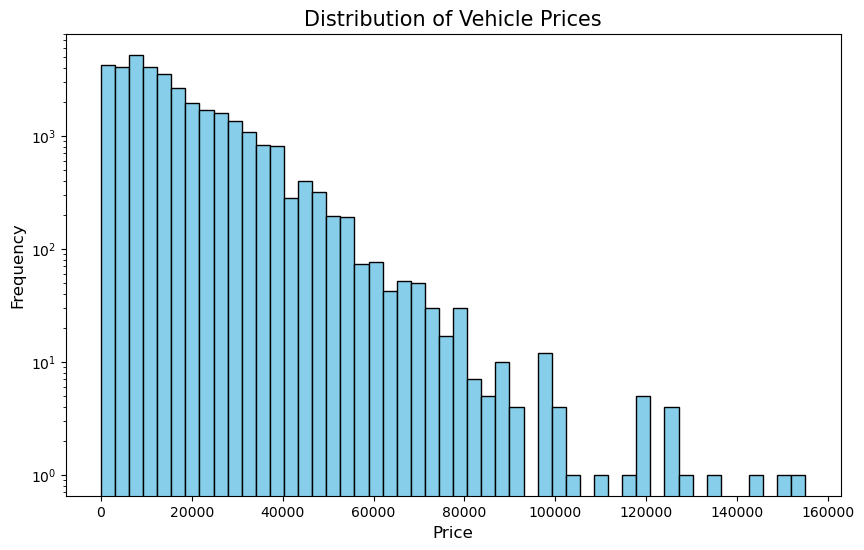

In [12]:
# Plotting the distribution of the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(cleaned_vehicles_df_dropna['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Prices', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')  # Using log scale due to high variance in price distribution
plt.show()

In [14]:
# Creating scatter plots to explore relationships between price and continuous variables
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Price ($)')

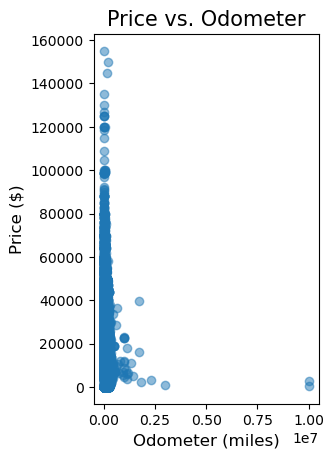

In [16]:
# Scatter plot for price vs. odometer
plt.subplot(1, 2, 1)
plt.scatter(cleaned_vehicles_df_dropna['odometer'], cleaned_vehicles_df_dropna['price'], alpha=0.5)
plt.title('Price vs. Odometer', fontsize=15)
plt.xlabel('Odometer (miles)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

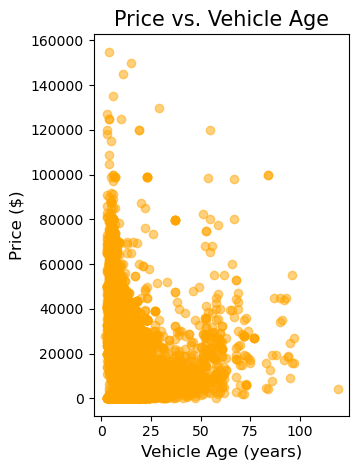

In [18]:
# Scatter plot for price vs. vehicle age
plt.subplot(1, 2, 2)
plt.scatter(cleaned_vehicles_df_dropna['vehicle_age'], cleaned_vehicles_df_dropna['price'], alpha=0.5, color='orange')
plt.title('Price vs. Vehicle Age', fontsize=15)
plt.xlabel('Vehicle Age (years)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

plt.tight_layout()
plt.show()


In [20]:
# Creating box plots to explore the relationships between price and key categorical variables

plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

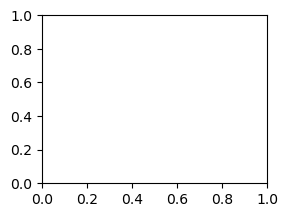

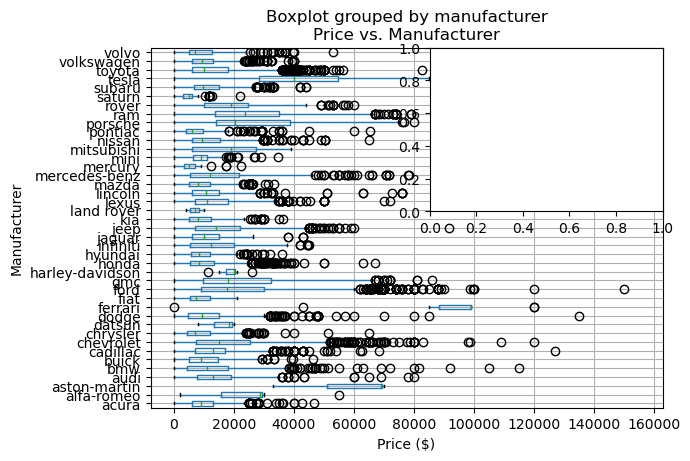

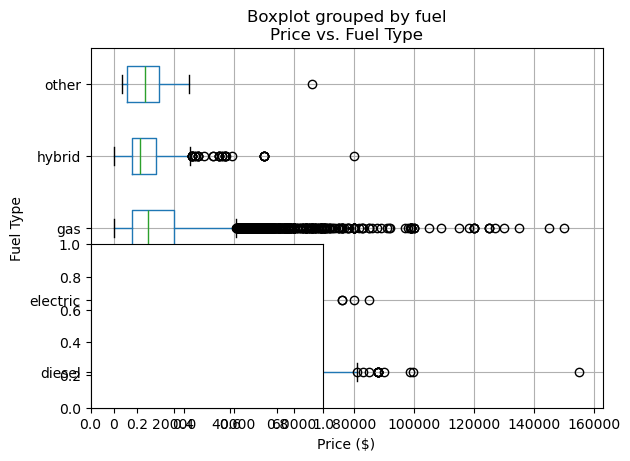

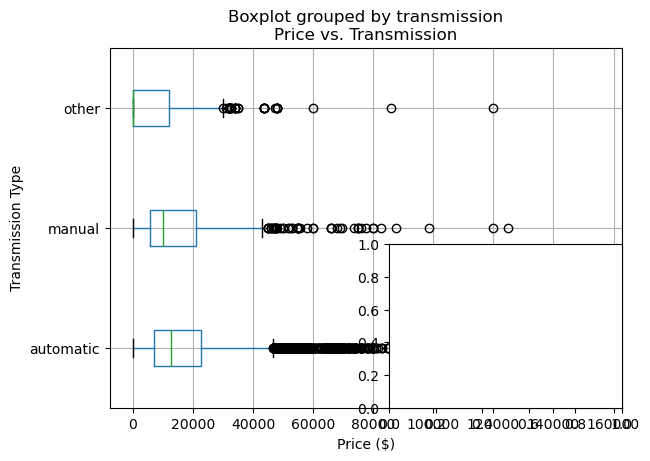

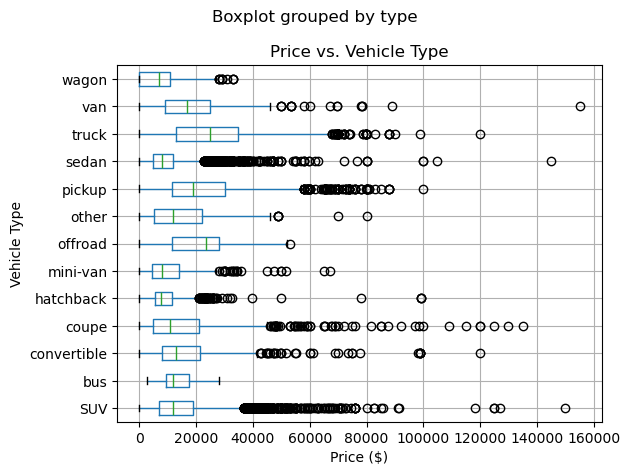

In [22]:
# Box plot for manufacturer vs. price
plt.subplot(2, 2, 1)
cleaned_vehicles_df_dropna.boxplot(column='price', by='manufacturer', vert=False)
plt.title('Price vs. Manufacturer')
plt.xlabel('Price ($)')
plt.ylabel('Manufacturer')

# Box plot for fuel vs. price
plt.subplot(2, 2, 2)
cleaned_vehicles_df_dropna.boxplot(column='price', by='fuel', vert=False)
plt.title('Price vs. Fuel Type')
plt.xlabel('Price ($)')
plt.ylabel('Fuel Type')

# Box plot for transmission vs. price
plt.subplot(2, 2, 3)
cleaned_vehicles_df_dropna.boxplot(column='price', by='transmission', vert=False)
plt.title('Price vs. Transmission')
plt.xlabel('Price ($)')
plt.ylabel('Transmission Type')

# Box plot for type vs. price
plt.subplot(2, 2, 4)
cleaned_vehicles_df_dropna.boxplot(column='price', by='type', vert=False)
plt.title('Price vs. Vehicle Type')
plt.xlabel('Price ($)')
plt.ylabel('Vehicle Type')

plt.tight_layout()
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [25]:
# Splitting the dataset into features and target variable
X = cleaned_vehicles_df_dropna.drop(columns=['price'])
y = cleaned_vehicles_df_dropna['price']

In [27]:
# Convert categorical features to numerical using OneHotEncoding
categorical_features = ['manufacturer', 'fuel', 'transmission', 'type', 'title_status', 'state', 'region']
numerical_features = ['odometer', 'vehicle_age']

In [29]:
# Defining the column transformer to handle categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [31]:
# Defining the models to be used
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(alpha=0.01, max_iter=20000)
}

In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Evaluating models using cross-validation and grid search for hyperparameter tuning
results = {}

for model_name, model in models.items():
    try:
        # Creating a pipeline with preprocessor and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        
        # Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
        
        # Fitting the model
        pipeline.fit(X_train, y_train)
        
        # Predicting on the test set
        y_pred = pipeline.predict(X_test)
        
        # Evaluating the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Storing the results
        results[model_name] = {
            'Cross-Validation R^2 Mean': np.mean(cv_scores),
            'Test R^2': r2,
            'Test MSE': mse
        }
        
        # Printing individual model results
        print(f"{model_name} Results:")
        print(f"Cross-Validation R² Mean: {np.mean(cv_scores):.4f}")
        print(f"Test R²: {r2:.4f}")
        print(f"Test MSE: {mse:.2f}\n")
    
    except NotFittedError as e:
        print(f"Model {model_name} could not be fitted: {str(e)}")
    except Exception as e:
        print(f"An error occurred with model {model_name}: {str(e)}")

# Converting the results dictionary to a DataFrame
results_df_dropna = pd.DataFrame(results).T
print("Summary of All Models:")
print(results_df_dropna)

Linear Regression Results:
Cross-Validation R² Mean: 0.4317
Test R²: 0.3961
Test MSE: 114075479.92

Ridge Regression Results:
Cross-Validation R² Mean: 0.4331
Test R²: 0.3977
Test MSE: 113774739.38



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
"Vehicle Age is a Primary Driver of Price"

In [ ]:
"Manufacturer Significantly Influences Price"

In [ ]:
"Odometer Reading is Critical"

In [ ]:
"Condition Matters"